# Reconhecimento óptico de caracteres

![Um robô lendo um jornal](./images/ocr.jpg)

Um desafio comum da pesquisa visual computacional é detectar e interpretar textos em uma imagem. Esse tipo de processamento é chamado normalmente de *reconhecimento óptico de caracteres* (OCR).

## Use o serviço de Pesquisa Visual Computacional para ler textos de uma imagem

O serviço cognitivo de **Pesquisa Visual Computacional** oferece suporte a tarefas de OCR, entre elas:

- Uma API de **OCR** que pode ser usada para ler textos em vários idiomas. Essa API pode ser usada de maneira síncrona e funciona bem quando você precisa detectar e ler uma pequena quantidade de texto em uma imagem.
- Uma API de **Leitura** otimizada para documentos maiores. Essa API é usada de maneira assíncrona e compatível com texto impresso ou manuscrito.

Você pode usar esse serviço criando um recurso de **Pesquisa Visual Computacional** ou de **Serviços Cognitivos**.

Caso ainda não tenha feito isso, crie um recurso dos **Serviços Cognitivos** na sua assinatura do Azure.

> **Observação**: Se você já tiver um recurso dos Serviços Cognitivos, abra a página de **Início Rápido** no portal do Azure e copie a respectiva chave e o ponto de extremidade para a célula abaixo. Caso contrário, siga as etapas abaixo para criar um.

1. Em outra guia do navegador, abra o portal do Azure em https://portal.azure.com e conecte-se com a sua conta Microsoft.

2. Clique no botão **&#65291;Criar um recurso**, procure *Serviços Cognitivos* e crie um recurso dos **Serviços Cognitivos** com as configurações abaixo:
    - **Assinatura**: *sua assinatura do Azure*.
    - **Grupo de recursos**: *Selecione ou crie um grupo de recursos com um nome exclusivo*.
    - **Região**: *Escolha qualquer região disponível*:
    - **Nome**: *Insira um nome exclusivo*.
    - **Tipo de preço**: S0
    - **Confirmo que li e entendi os avisos**: Selecionado.
3. Aguarde até que a implantação seja concluída. Depois, entre em seu recurso dos Serviços Cognitivos e, na página **Visão geral**, clique no link para gerenciar as chaves do serviço. Você precisará do ponto de extremidade e das chaves para se conectar aos seus recursos dos Serviços Cognitivos em aplicativos clientes.

### Obter a chave e o ponto de extremidade do seu recurso dos Serviços Cognitivos

Para usar seu recurso dos Serviços Cognitivos, os aplicativos clientes precisam do ponto de extremidade e da chave de autenticação:

1. No portal do Azure, na página **Chaves e ponto de extremidade** do seu recurso dos Serviços Cognitivos, copie a **Chave 1** do recurso e cole no código abaixo, substituindo **YOUR_COG_KEY**.
2. Copie o **ponto de extremidade** do recurso e cole no código abaixo, substituindo **YOUR_COG_ENDPOINT**.
3. Execute o código na célula abaixo clicando no botão **Executar célula** (&#9655;) (à esquerda).

In [1]:
cog_key = 'e09c79f3eeb54c2894df8b52f297e8f2'
cog_endpoint = 'https://cs-hsouza-01.cognitiveservices.azure.com/'

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://cs-hsouza-01.cognitiveservices.azure.com/ using key e09c79f3eeb54c2894df8b52f297e8f2


Agora que você já configurou a chave e o ponto de extremidade, poderá usar o recurso de serviço de Pesquisa Visual Computacional para extrair texto de uma imagem.

Vamos começar com a API de **OCR**, que possibilita a análise síncrona e a leitura do texto contido em uma imagem. Neste caso, você tem uma imagem publicitária da empresa varejista fictícia Northwind Traders que inclui texto. Execute a célula abaixo para ler. 

Microsoft Azure AI Fundamentals (AI-900)
Curso Oficial completo preparatório para o exame Al-900
24/07 (Sábado)
das 09hOO às 18hOO
>> Quero me inscrever


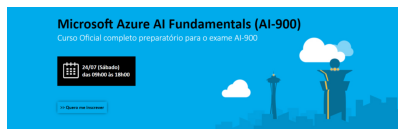

In [3]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os
%matplotlib inline

# Obter um cliente para o serviço de pesquisa visual computacional
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# Ler o arquivo de imagem
image_path = os.path.join('data', 'ocr', 'AI900.png')
image_stream = open(image_path, "rb")

# Use o serviço de Pesquisa Visual Computacional para encontrar texto na imagem
read_results = computervision_client.recognize_printed_text_in_stream(image_stream)

# Processar o texto linha por linha
for region in read_results.regions:
    for line in region.lines:

        # Read the words in the line of text
        line_text = ''
        for word in line.words:
            line_text += word.text + ' '
        print(line_text.rstrip())

# Abrir a imagem para exibi-la.
fig = plt.figure(figsize=(7, 7))
img = Image.open(image_path)
draw = ImageDraw.Draw(img)
plt.axis('off')
plt.imshow(img)

O texto encontrado na imagem é organizado em uma estrutura hierárquica de regiões, linhas e palavras. O código lê essas informações para recuperar os resultados.

Nos resultados, veja o texto que foi lido acima da imagem. 

## Exibir caixas delimitadoras

O resultado também inclui coordenadas de *caixa delimitadora* para as linhas do texto e palavras individuais encontradas na imagem. Execute a célula abaixo para ver as caixas delimitadoras das linhas de texto na imagem publicitária que você recuperou acima.

Microsoft Azure AI Fundamentals (AI-900)
Curso Oficial completo preparatório para o exame Al-900
24/07 (Sábado)
das 09hOO às 18hOO
>> Quero me inscrever


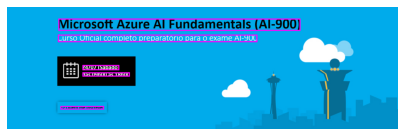

In [4]:
# Abrir a imagem para exibi-la.
fig = plt.figure(figsize=(7, 7))
img = Image.open(image_path)
draw = ImageDraw.Draw(img)

# Processar o texto linha por linha
for region in read_results.regions:
    for line in region.lines:

        # Show the position of the line of text
        l,t,w,h = list(map(int, line.bounding_box.split(',')))
        draw.rectangle(((l,t), (l+w, t+h)), outline='magenta', width=5)

        # Read the words in the line of text
        line_text = ''
        for word in line.words:
            line_text += word.text + ' '
        print(line_text.rstrip())

# Exibir a imagem com a localização dos textos destacada
plt.axis('off')
plt.imshow(img)

No resultado, a caixa delimitadora de cada linha do texto é exibida como um retângulo na imagem.

## Usar a API de Leitura

A API de OCR usada anteriormente funciona bem para imagens com pequenas quantidades de texto. Quando precisar ler corpos de texto maiores, como documentos digitalizados, você poderá usar a API de **Leitura**. Para isso, siga esse processo de várias etapas:

1. Envie uma imagem para o serviço de Pesquisa Visual Computacional para ser lida e analisada de maneira assíncrona.
2. Aguarde até que a operação de análise seja concluída.
3. Recupere os resultados da análise.

Execute a célula abaixo para usar esse processo para ler o texto de uma carta escaneada para o gerente de uma loja da Northwind Traders.

January 23rd 2020
For the attention of:
The manager
Northwind Traders
123 Any Street
Bellevue, WA
Dear Sir or Madam,
I am writing to thank you for the fantastic service I received at
your store on January 20th. The store assistant who helped me was
extremely pleasant and attentive; and took the time to find all of
the fresh produce I needed.
I've always found the quality of the produce in your store to be
high, and the prices to be competitive; and the helpfulness of your
employees is another reason I will continue to remain a loyal
Northwind Traders customer.
Sincerely,
A customer
A. Customer




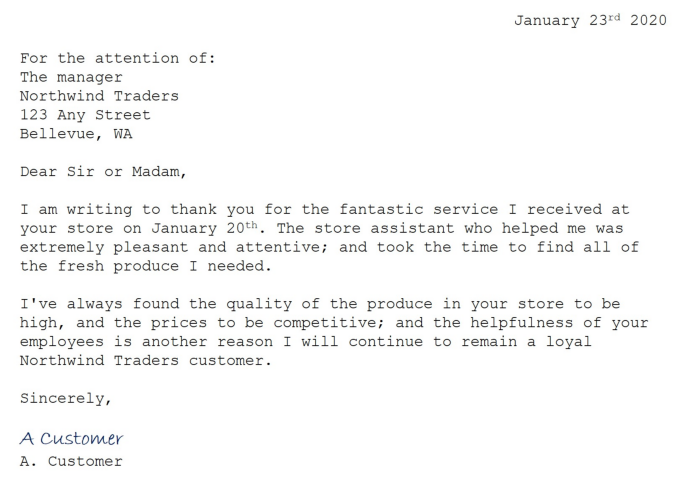

In [5]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from msrest.authentication import CognitiveServicesCredentials
import matplotlib.pyplot as plt
from PIL import Image
import time
import os
%matplotlib inline

# Ler o arquivo de imagem
image_path = os.path.join('data', 'ocr', 'letter.jpg')
image_stream = open(image_path, "rb")

# Obter um cliente para o serviço de pesquisa visual computacional
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# Enviar uma solicitação para ler texto impresso na imagem e obter a ID da operação
read_operation = computervision_client.read_in_stream(image_stream,
                                                      raw=True)
operation_location = read_operation.headers["Operation-Location"]
operation_id = operation_location.split("/")[-1]

# Aguarde até que a operação assíncrona seja concluída
while True:
    read_results = computervision_client.get_read_result(operation_id)
    if read_results.status not in [OperationStatusCodes.running]:
        break
    time.sleep(1)

# Se a operação for bem-sucedida, processe o texto linha por linha
if read_results.status == OperationStatusCodes.succeeded:
    for result in read_results.analyze_result.read_results:
        for line in result.lines:
            print(line.text)

# Abrir e exibir a imagem.
print('\n')
fig = plt.figure(figsize=(12,12))
img = Image.open(image_path)
plt.axis('off')
plt.imshow(img)

Examine os resultados. Há uma transcrição completa da carta, que consiste principalmente em texto impresso com uma assinatura manuscrita. A imagem original da carta é exibida abaixo dos resultados do OCR (talvez você precise rolar a tela para vê-la).

## Ler texto manuscrito

No exemplo anterior, a solicitação para analisar a imagem especificou um modo de reconhecimento de texto que otimizou a operação para texto *impresso*. Observe que, apesar disso, a assinatura manuscrita foi lida.

Essa capacidade de ler texto manuscrito é extremamente útil. Por exemplo, suponha que você tenha escrito um bilhete que contém uma lista de compras e queira usar um aplicativo no celular para ler as anotações e transcrever o texto do papel.

Execute a célula abaixo para ver um exemplo de operação de leitura de uma lista de compras manuscrita.

# Ka Solution
HSOUZA
A1900




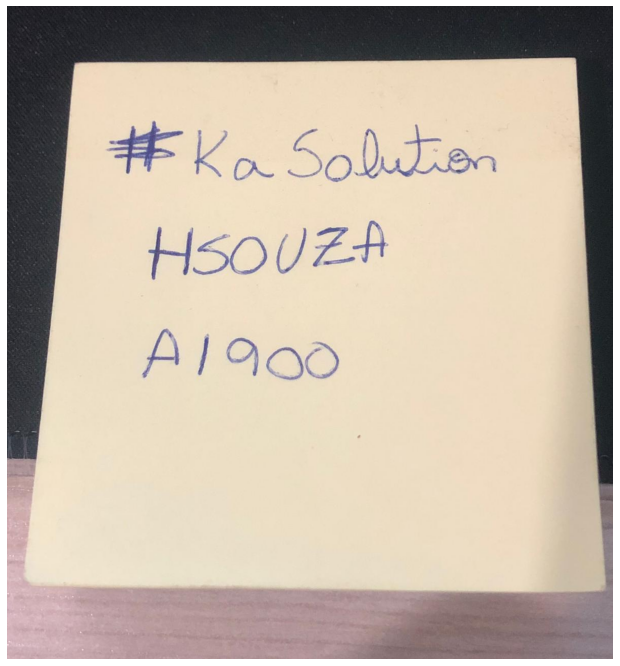

In [7]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from msrest.authentication import CognitiveServicesCredentials
import matplotlib.pyplot as plt
from PIL import Image
import time
import os
%matplotlib inline

# Ler o arquivo de imagem
image_path = os.path.join('data', 'ocr', 'bilhete.jpeg')
image_stream = open(image_path, "rb")

# Obter um cliente para o serviço de pesquisa visual computacional
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# Enviar uma solicitação para ler texto impresso na imagem e obter a ID da operação
read_operation = computervision_client.read_in_stream(image_stream,
                                                      raw=True)
operation_location = read_operation.headers["Operation-Location"]
operation_id = operation_location.split("/")[-1]

# Aguarde até que a operação assíncrona seja concluída
while True:
    read_results = computervision_client.get_read_result(operation_id)
    if read_results.status not in [OperationStatusCodes.running]:
        break
    time.sleep(1)

# Se a operação for bem-sucedida, processe o texto linha por linha
if read_results.status == OperationStatusCodes.succeeded:
    for result in read_results.analyze_result.read_results:
        for line in result.lines:
            print(line.text)

# Abrir e exibir a imagem.
print('\n')
fig = plt.figure(figsize=(12,12))
img = Image.open(image_path)
plt.axis('off')
plt.imshow(img)

## Mais informações

Para mais informações sobre como usar o serviço de Pesquisa Visual Computacional para OCR, consulte a [documentação da Pesquisa Visual Computacional](https://docs.microsoft.com/pt-br/azure/cognitive-services/computer-vision/concept-recognizing-text)